#SUPPORT VECTOR MACHINE

##Dataset Selection:
For this assignment, we'll utilize the widely recognized Mushroom Dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

##Task 1: Exploratory Data Analysis (EDA)
1.	Load the Mushroom dataset and perform fundamental data exploration.
2.	Utilize histograms, box plots, or density plots to understand feature distributions.
3.	Investigate feature correlations to discern relationships within the data.


In [2]:
mushroom = pd.read_csv('/content/mushroom.csv')
mushroom

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [3]:
mushroom.info()
# There are total 2000 entries with 26 columns
# 'Unnamed: 0' is of the 'int64' dtype
# 'stalk_height' and 'cap_diameter' are of the 'float64' dtype
# All the other columns are of the 'object' dtype
# There are no null values present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [4]:
mushroom.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


In [5]:
# We do not need 'Unnamed: 0' column, so lets remove it
mushroom.drop(columns=['Unnamed: 0'], inplace=True)
mushroom.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [6]:
mushroom.duplicated().sum()
# There are some duplicate values present

1024

In [7]:
mushroom.drop_duplicates(inplace=True)
mushroom.duplicated().sum()
# All the duplicate values have been removed

0

In [8]:
mushroom.reset_index(inplace=True, drop=True)
mushroom

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,conical,grooves,brown,no,foul,notched,crowded,broad,chocolate,tapering,...,universal,brown,none,large,brown,numerous,paths,edible,13.020616,9.993008
972,bell,grooves,pink,yes,anise,descending,distant,broad,brown,enlarging,...,partial,brown,two,pendant,yellow,numerous,grasses,poisonous,3.751597,18.868135
973,sunken,smooth,purple,yes,anise,descending,crowded,narrow,buff,tapering,...,universal,orange,two,none,orange,abundant,grasses,edible,13.134058,15.740028
974,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,tapering,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957


In [9]:
mushroom.isna().sum()
# No null values are present

,0
cap_shape,0
cap_surface,0
cap_color,0
bruises,0
odor,0
gill_attachment,0
gill_spacing,0
gill_size,0
gill_color,0
stalk_shape,0


<Axes: >

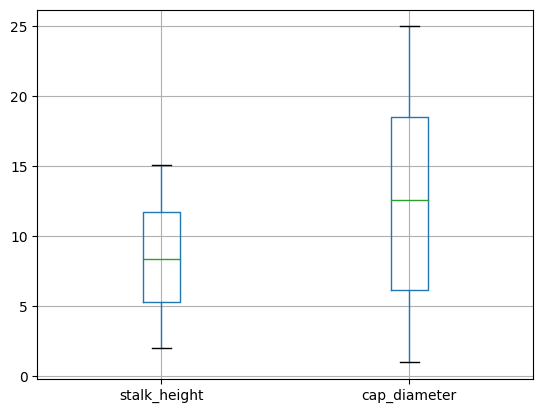

In [10]:
mushroom.boxplot()
# No outliers are present

array([[<Axes: title={'center': 'stalk_height'}>,
        <Axes: title={'center': 'cap_diameter'}>]], dtype=object)

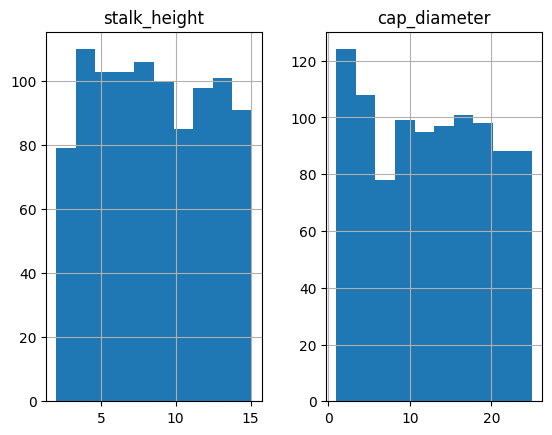

In [11]:
mushroom.hist()

<Axes: ylabel='Density'>

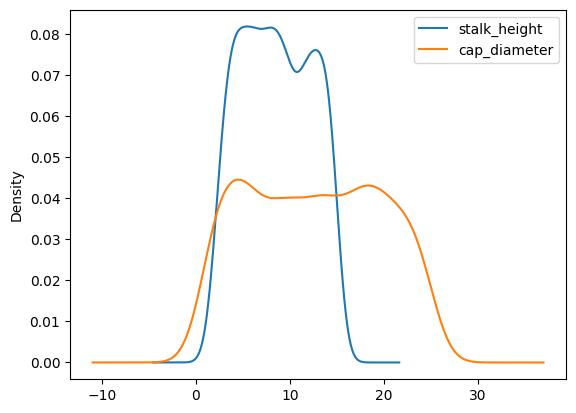

In [12]:
mushroom.plot.kde()

In [13]:
mushroom.corr(numeric_only=True)

,stalk_height,cap_diameter
stalk_height,1.000000,-0.034891
cap_diameter,-0.034891,1.000000


<Axes: >

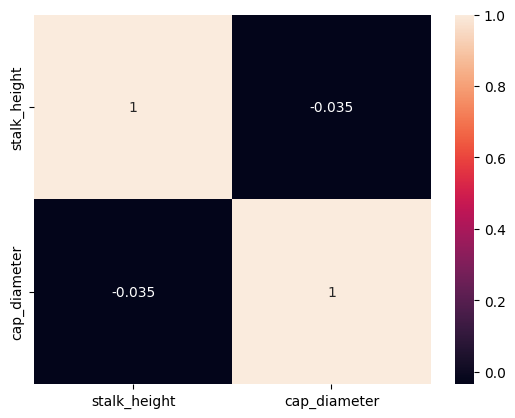

In [14]:
sns.heatmap(mushroom.corr(numeric_only=True), annot=True)
# Not much related to each other

##Task 2: Data Preprocessing
1.	Encode categorical variables if necessary.
2.	Split the dataset into training and testing sets.


In [15]:
from sklearn.preprocessing import LabelEncoder

mushroom_encoded = mushroom.copy()
le = LabelEncoder()
for col in mushroom.select_dtypes(include=['object']).columns.tolist():
    mushroom_encoded[col] = le.fit_transform(mushroom_encoded[col])

mushroom_encoded.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,4,2,7,0,1,1,2,0,7,1,...,0,0,2,6,3,1,5,1,14.276173,5.054983
1,4,0,6,0,1,3,1,1,3,0,...,1,0,2,6,1,2,5,0,3.952715,19.068319
2,3,1,5,1,4,1,1,0,8,1,...,1,3,2,6,6,0,5,1,9.054265,7.205884
3,0,2,4,1,3,3,0,0,6,0,...,0,3,2,0,4,1,0,1,5.226499,20.932692
4,3,3,8,1,5,2,1,1,6,0,...,1,2,0,4,8,1,4,1,14.037532,12.545245


In [16]:
# For better handling lets shift the 'class' column to the rightmost side
mushroom_encoded['target'] = mushroom_encoded['class']
mushroom_encoded.drop(columns=['class'], inplace=True)
mushroom_encoded.rename(columns = {'target':'class'}, inplace = True)
mushroom_encoded

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,stalk_height,cap_diameter,class
0,4,2,7,0,1,1,2,0,7,1,...,0,0,2,6,3,1,5,14.276173,5.054983,1
1,4,0,6,0,1,3,1,1,3,0,...,1,0,2,6,1,2,5,3.952715,19.068319,0
2,3,1,5,1,4,1,1,0,8,1,...,1,3,2,6,6,0,5,9.054265,7.205884,1
3,0,2,4,1,3,3,0,0,6,0,...,0,3,2,0,4,1,0,5.226499,20.932692,1
4,3,3,8,1,5,2,1,1,6,0,...,1,2,0,4,8,1,4,14.037532,12.545245,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,1,1,0,0,4,3,1,0,3,1,...,1,0,0,3,1,2,3,13.020616,9.993008,0
972,0,1,4,1,1,1,2,0,1,0,...,0,0,2,5,8,2,0,3.751597,18.868135,1
973,4,3,5,1,1,1,1,1,2,1,...,1,1,2,4,5,0,0,13.134058,15.740028,0
974,4,2,5,1,5,0,2,1,9,1,...,0,2,1,7,8,2,5,6.500840,13.501957,1


In [17]:
# Lets separate the data into a set of dependent variables and independent variable.
X = mushroom_encoded.iloc[:,:-1]
Y = mushroom_encoded.iloc[:,-1]

In [18]:
X

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,stalk_height,cap_diameter
0,4,2,7,0,1,1,2,0,7,1,...,8,0,0,2,6,3,1,5,14.276173,5.054983
1,4,0,6,0,1,3,1,1,3,0,...,0,1,0,2,6,1,2,5,3.952715,19.068319
2,3,1,5,1,4,1,1,0,8,1,...,3,1,3,2,6,6,0,5,9.054265,7.205884
3,0,2,4,1,3,3,0,0,6,0,...,5,0,3,2,0,4,1,0,5.226499,20.932692
4,3,3,8,1,5,2,1,1,6,0,...,7,1,2,0,4,8,1,4,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,1,1,0,0,4,3,1,0,3,1,...,8,1,0,0,3,1,2,3,13.020616,9.993008
972,0,1,4,1,1,1,2,0,1,0,...,5,0,0,2,5,8,2,0,3.751597,18.868135
973,4,3,5,1,1,1,1,1,2,1,...,6,1,1,2,4,5,0,0,13.134058,15.740028
974,4,2,5,1,5,0,2,1,9,1,...,4,0,2,1,7,8,2,5,6.500840,13.501957


In [19]:
Y

,class
0,1
1,0
2,1
3,1
4,1
...,...
971,0
972,1
973,0
974,1


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [21]:
X_train

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,stalk_height,cap_diameter
679,2,0,0,0,0,3,1,0,10,0,...,7,1,3,1,7,8,5,2,6.652204,13.983271
625,4,2,5,1,5,1,2,1,0,0,...,3,0,3,1,7,4,1,3,11.954210,21.043446
33,1,0,4,0,2,0,0,0,6,1,...,3,0,2,1,0,5,4,4,10.425017,5.365538
31,2,0,6,1,7,1,0,0,5,1,...,7,0,2,2,7,1,4,4,7.865522,17.766535
883,3,3,7,0,3,0,0,1,10,0,...,1,0,1,1,6,6,2,5,7.879913,7.395733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,2,2,3,0,8,2,0,1,0,0,...,4,0,2,2,2,7,0,0,12.530973,24.085799
270,1,0,0,1,6,3,0,1,8,1,...,6,0,0,2,7,0,2,4,6.999874,5.313401
860,3,1,8,0,1,1,0,1,7,1,...,1,1,1,1,1,7,1,2,3.532307,14.192780
435,2,3,4,1,0,1,2,1,0,0,...,7,0,3,1,6,1,4,4,7.412868,21.212782


In [22]:
Y_train

,class
679,0
625,0
33,1
31,1
883,0
...,...
106,1
270,0
860,0
435,1


In [23]:
X_test

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,stalk_height,cap_diameter
199,0,3,8,1,7,0,2,0,1,0,...,2,1,3,0,3,1,3,1,4.159779,2.982915
541,3,0,0,0,3,1,0,1,0,1,...,0,1,1,0,5,5,5,6,6.317679,12.285183
174,2,3,3,1,6,3,1,1,5,0,...,1,0,2,0,7,3,4,4,2.237103,23.400092
468,1,1,1,1,2,0,2,0,8,1,...,6,0,0,0,4,7,3,2,8.298437,14.716545
66,1,1,3,1,7,0,0,0,4,0,...,7,1,2,1,0,8,5,2,13.767034,3.318183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,1,3,3,1,7,2,1,0,0,1,...,5,0,2,0,6,2,2,3,14.604493,16.413350
881,3,3,3,0,2,0,1,1,9,1,...,4,1,2,0,7,6,3,5,5.850646,10.648827
523,4,0,7,0,6,2,2,1,5,1,...,2,1,2,1,6,6,5,1,6.877029,19.657464
689,3,1,2,1,3,3,2,0,4,1,...,4,0,1,1,2,6,1,6,3.664237,24.433769


In [24]:
Y_test

,class
199,1
541,1
174,1
468,1
66,1
...,...
824,0
881,1
523,1
689,1


##Task 3: Data Visualization
1.	Employ scatter plots, pair plots, or relevant visualizations to comprehend feature distributions and relationships.
2.	Visualize class distributions to gauge dataset balance or imbalance.


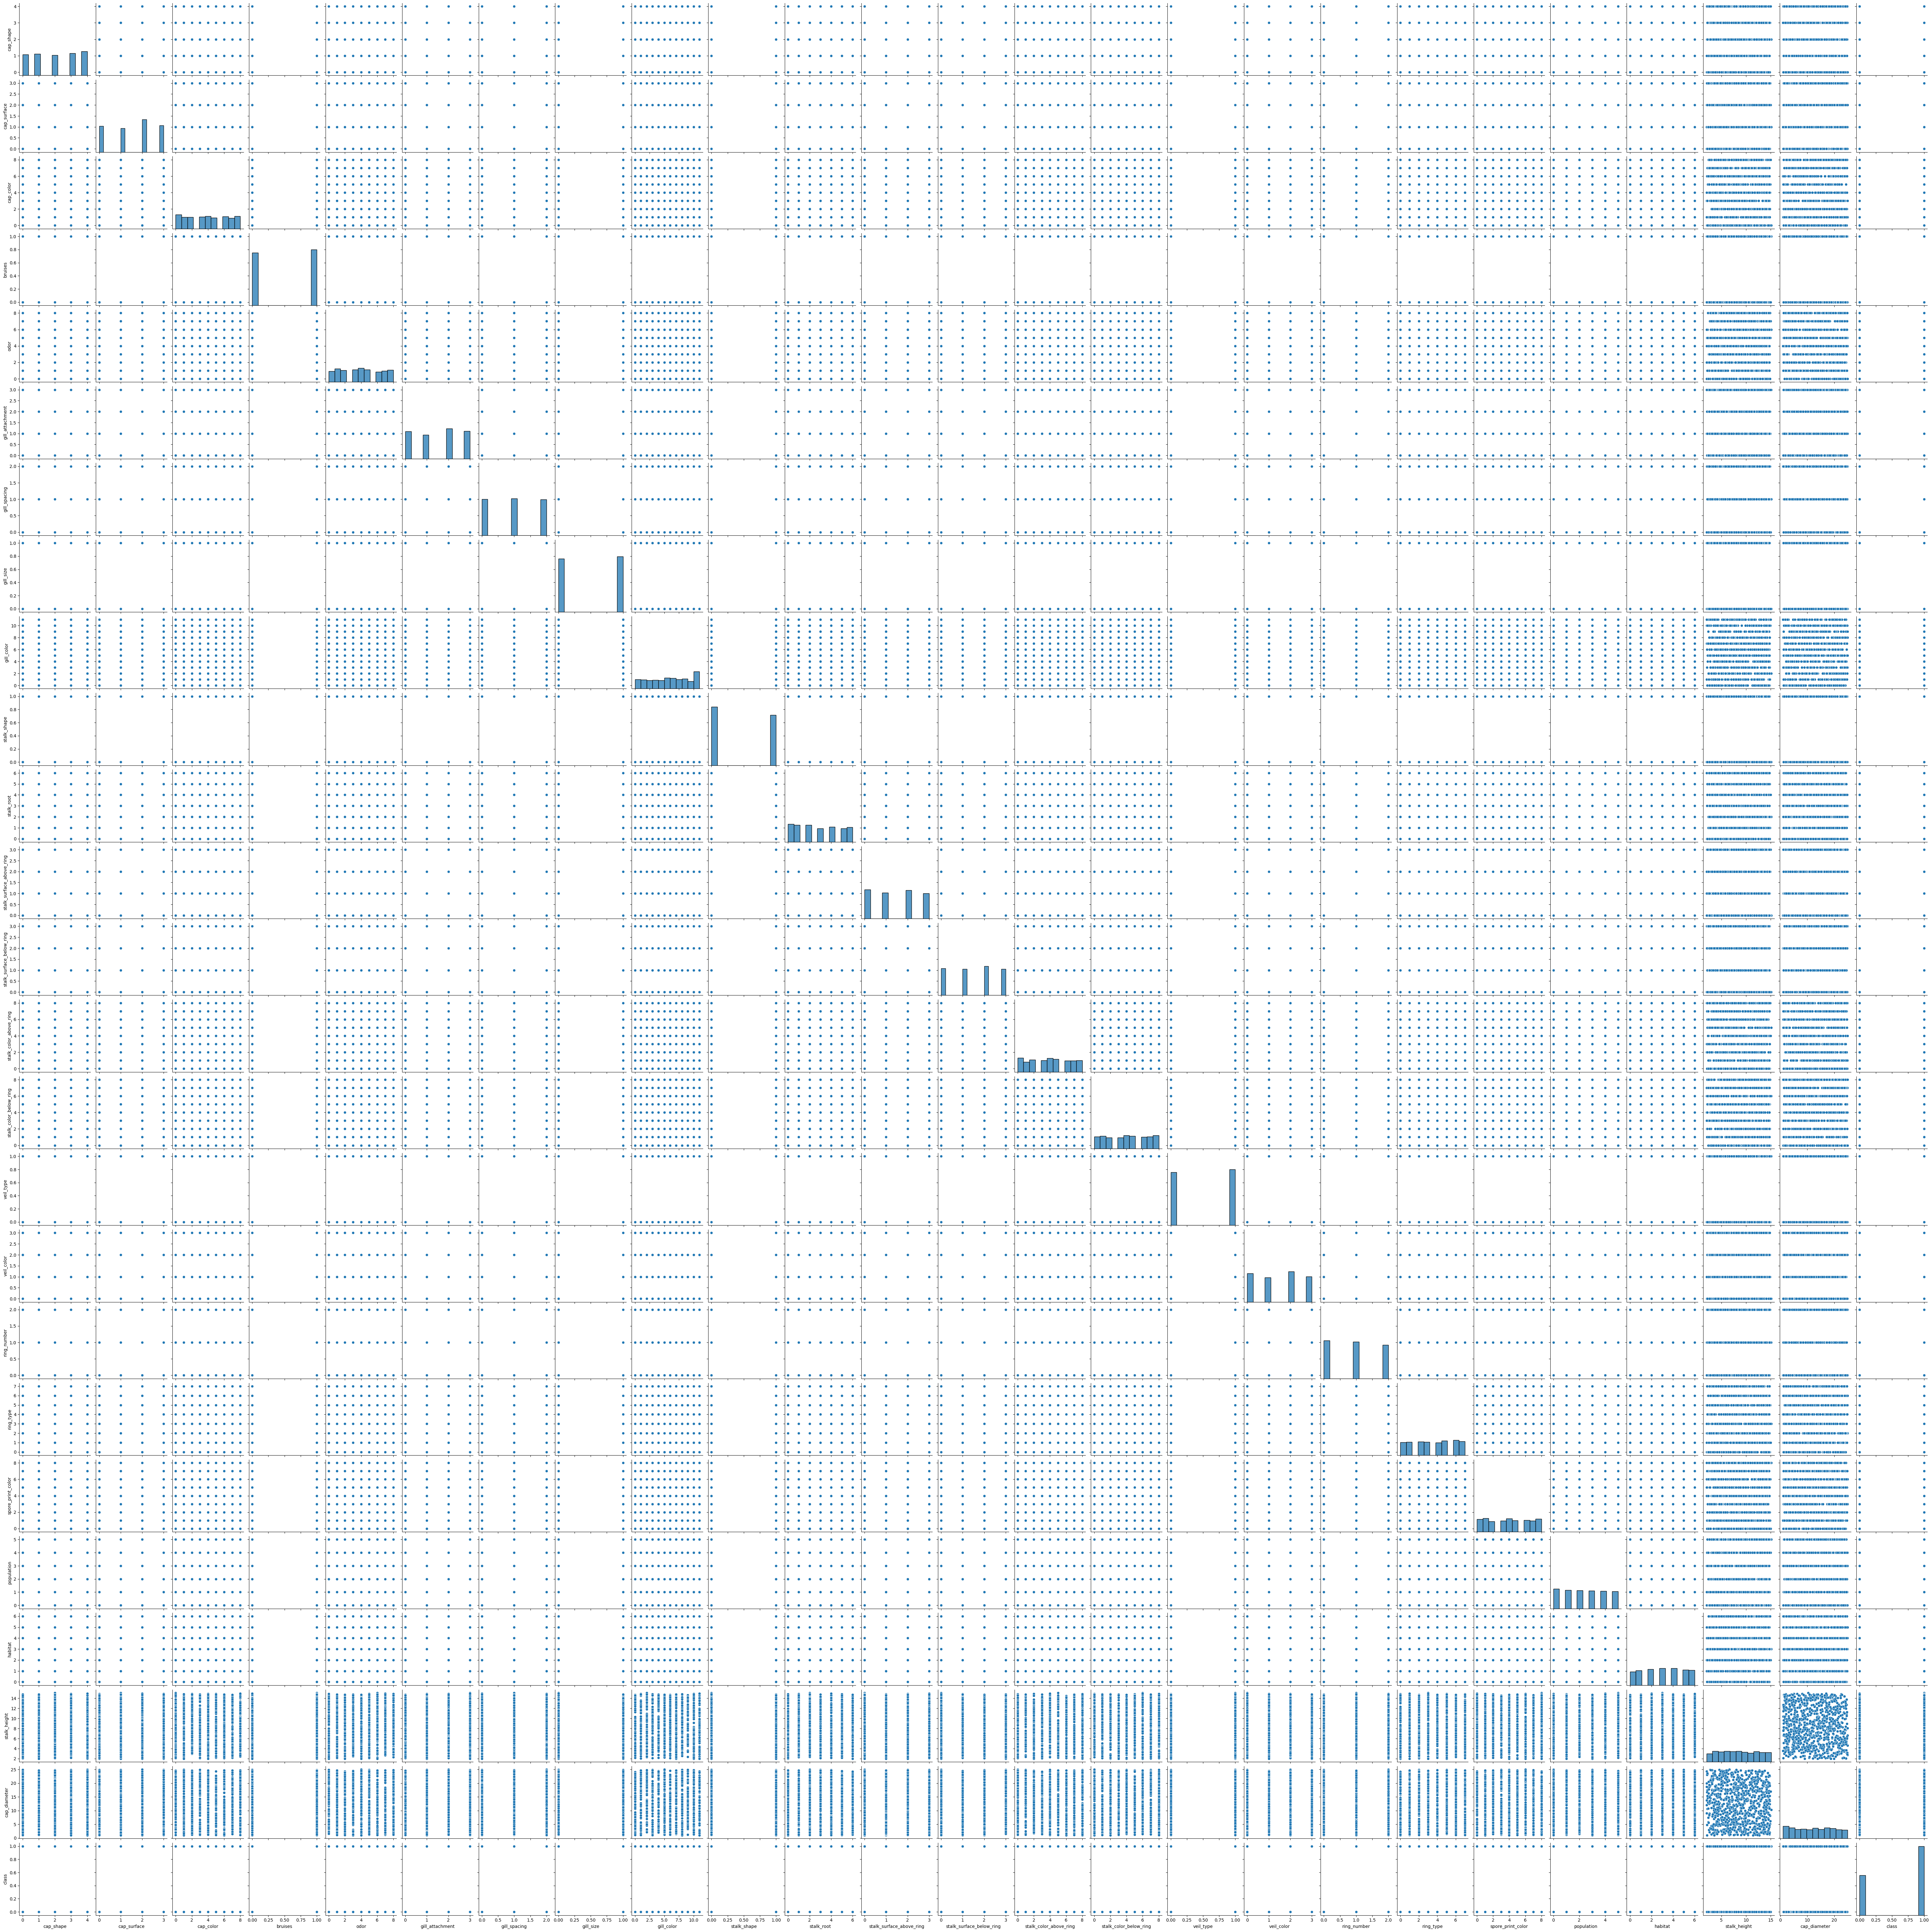

In [25]:
sns.pairplot(mushroom_encoded)

<Axes: xlabel='class', ylabel='count'>

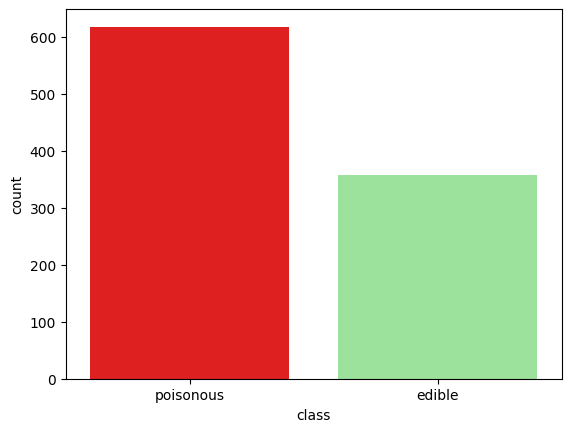

In [26]:
sns.countplot(mushroom, x='class', hue='class',palette=['red', 'lightgreen'])
# We can clearly see that the data is imbalanced

In [27]:
mushroom.columns

Index(['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')

Text(0.5, 1.0, 'Countplot for Cap Shape')

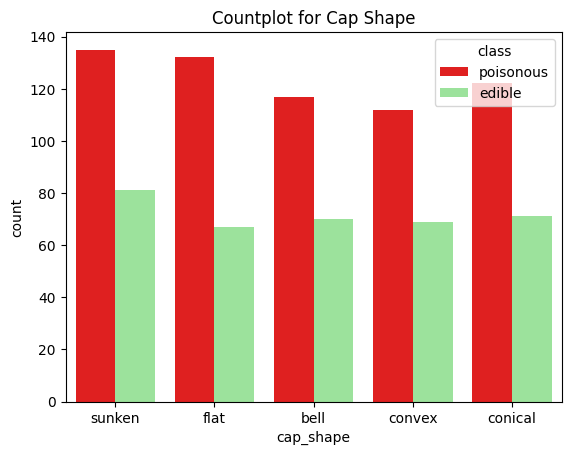

In [28]:
sns.countplot(mushroom, x='cap_shape', palette=['red', 'lightgreen'], hue='class')
plt.title('Countplot for Cap Shape')

Text(0.5, 1.0, 'Countplot for Cap Surface')

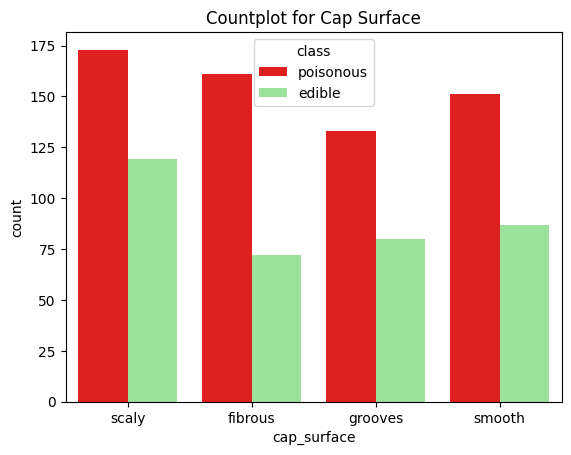

In [29]:
sns.countplot(mushroom, x='cap_surface', palette=['red', 'lightgreen'], hue='class')
plt.title('Countplot for Cap Surface')

Text(0.5, 1.0, 'Countplot for Cap Color')

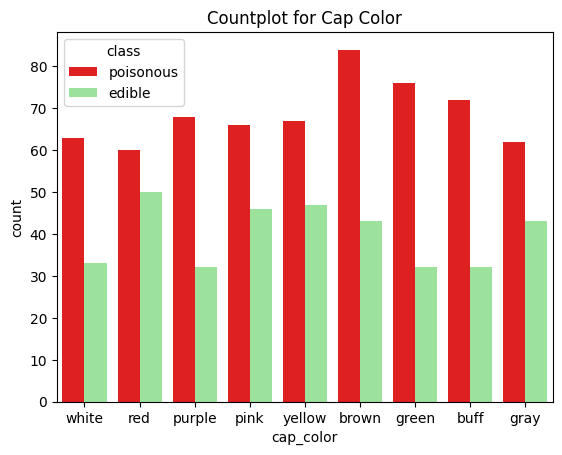

In [30]:
sns.countplot(mushroom, x='cap_color', palette=['red', 'lightgreen'], hue='class')
plt.title('Countplot for Cap Color')

Text(0.5, 1.0, 'Countplot for Bruises')

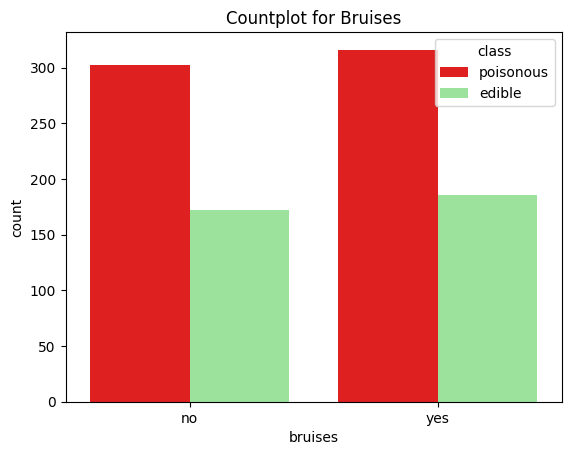

In [31]:
sns.countplot(mushroom, x='bruises', palette=['red', 'lightgreen'], hue='class')
plt.title('Countplot for Bruises')

Text(0.5, 1.0, 'Countplot for Odor')

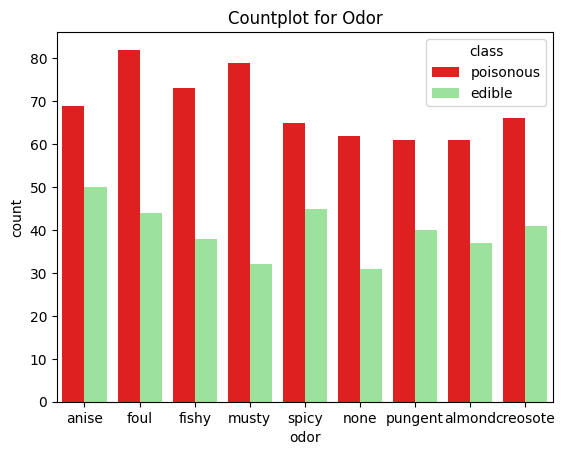

In [32]:
sns.countplot(mushroom, x='odor', palette=['red', 'lightgreen'], hue='class')
plt.title('Countplot for Odor')

Text(0.5, 1.0, 'Countplot for Gill Attachment')

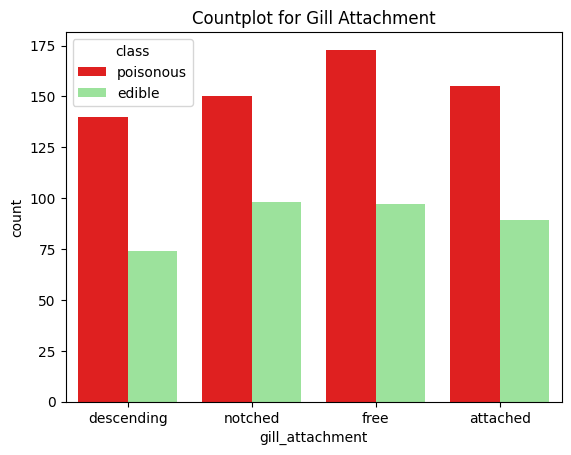

In [33]:
sns.countplot(mushroom, x='gill_attachment', palette=['red', 'lightgreen'], hue='class')
plt.title('Countplot for Gill Attachment')

Text(0.5, 1.0, 'Countplot for Gill Spacing')

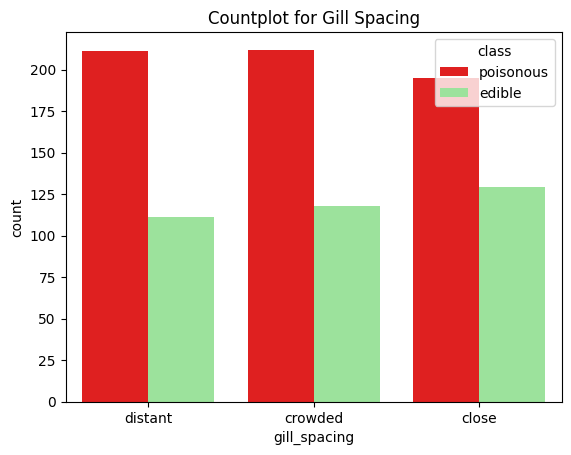

In [34]:
sns.countplot(mushroom, x='gill_spacing', palette=['red', 'lightgreen'], hue='class')
plt.title('Countplot for Gill Spacing')

Text(0.5, 1.0, 'Countplot for Gill Size')

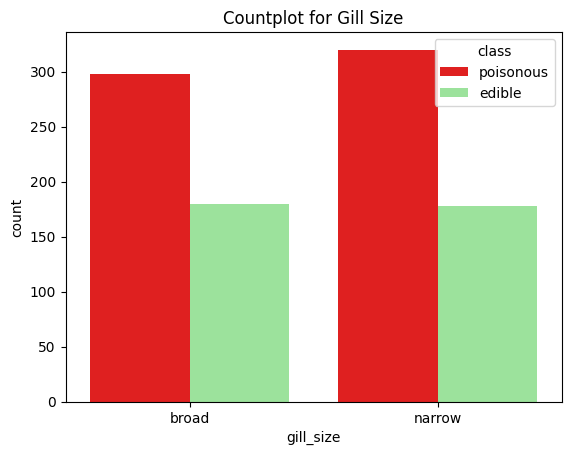

In [35]:
sns.countplot(mushroom, x='gill_size', palette=['red', 'lightgreen'], hue='class')
plt.title('Countplot for Gill Size')

Text(0.5, 1.0, 'Countplot for Gill Color')

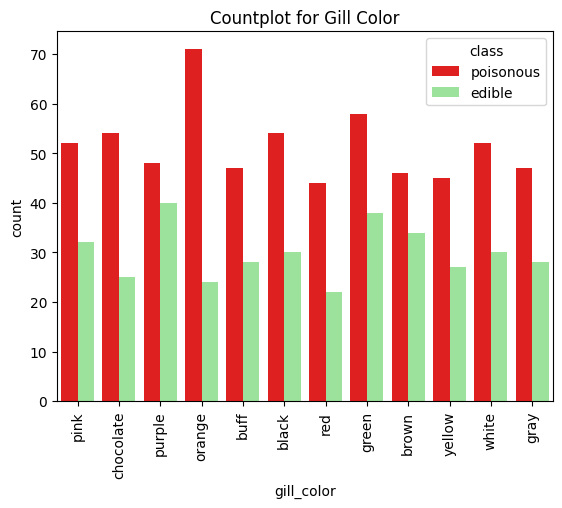

In [36]:
sns.countplot(mushroom, x='gill_color', palette=['red', 'lightgreen'], hue='class')
plt.xticks(rotation = 90)
plt.title('Countplot for Gill Color')

Text(0.5, 1.0, 'Countplot for Stalk Shape')

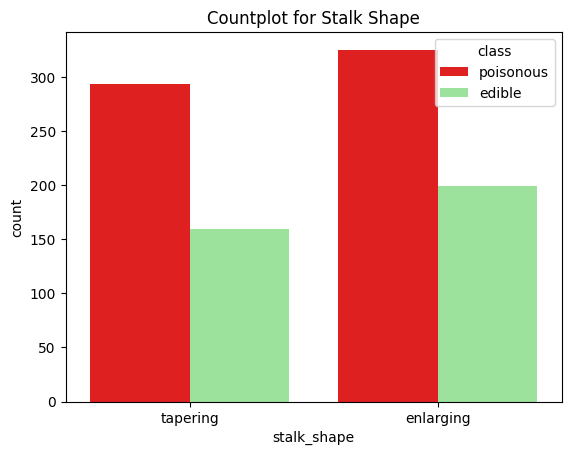

In [37]:
sns.countplot(mushroom, x='stalk_shape', palette=['red', 'lightgreen'], hue='class')
plt.title('Countplot for Stalk Shape')

Text(0.5, 1.0, 'Countplot for Stalk Root')

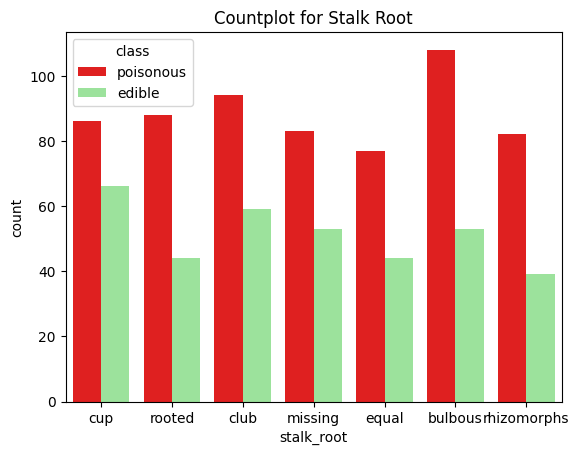

In [38]:
sns.countplot(mushroom, x='stalk_root', palette=['red', 'lightgreen'], hue='class')
plt.title('Countplot for Stalk Root')

Text(0.5, 1.0, 'Countplot for Stack Surface above ring')

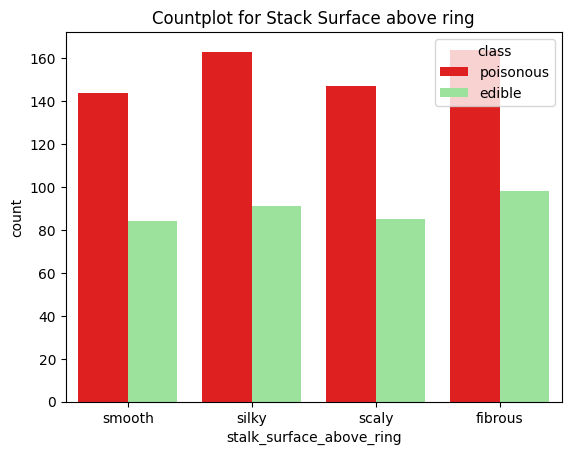

In [39]:
sns.countplot(mushroom, x='stalk_surface_above_ring', palette=['red', 'lightgreen'], hue='class')
plt.title('Countplot for Stack Surface above ring')

Text(0.5, 1.0, 'COuntplot for Stalk Surface Below Ring')

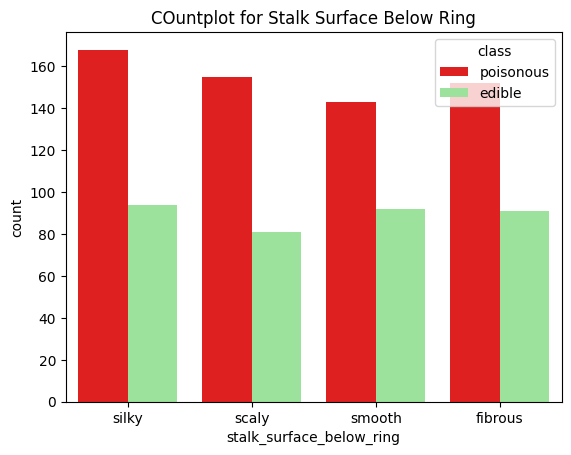

In [40]:
sns.countplot(mushroom, x='stalk_surface_below_ring', palette=['red', 'lightgreen'], hue='class')
plt.title('COuntplot for Stalk Surface Below Ring')

Text(0.5, 1.0, 'Countplot for Stalk Color Above Ring')

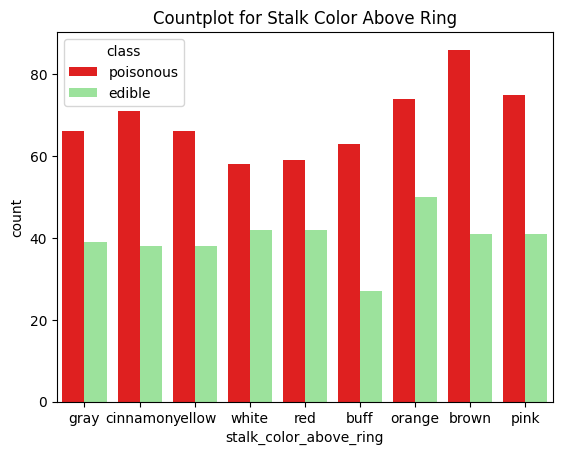

In [41]:
sns.countplot(mushroom, x='stalk_color_above_ring', palette=['red', 'lightgreen'], hue='class')
plt.title('Countplot for Stalk Color Above Ring')

Text(0.5, 1.0, 'Countplot for Stalkl Color Below Ring')

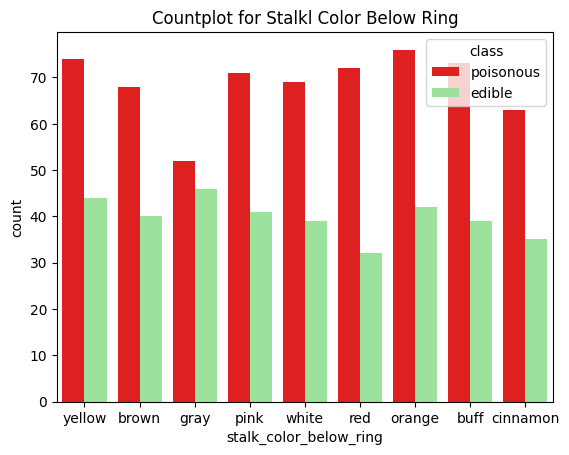

In [42]:
sns.countplot(mushroom, x='stalk_color_below_ring', palette=['red', 'lightgreen'], hue='class')
plt.title('Countplot for Stalkl Color Below Ring')

Text(0.5, 1.0, 'Countplot for Veil Type')

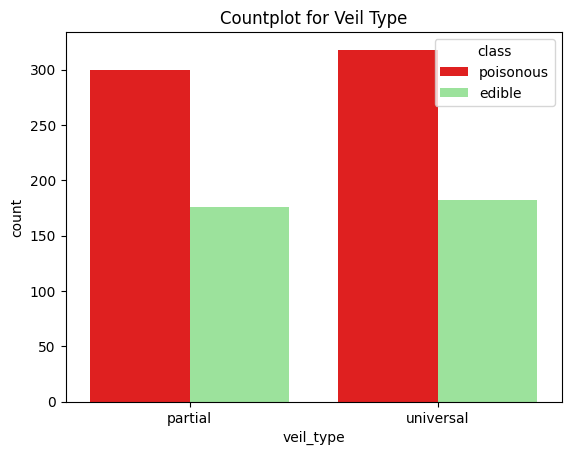

In [43]:
sns.countplot(mushroom, x='veil_type', palette=['red', 'lightgreen'], hue='class')
plt.title('Countplot for Veil Type')

Text(0.5, 1.0, 'Countplot for Veil Color')

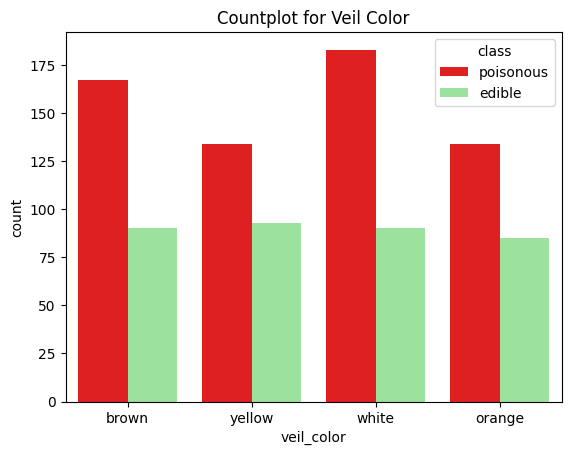

In [44]:
sns.countplot(mushroom, x='veil_color', palette=['red', 'lightgreen'], hue='class')
plt.title('Countplot for Veil Color')

Text(0.5, 1.0, 'Countplot for Ring Number')

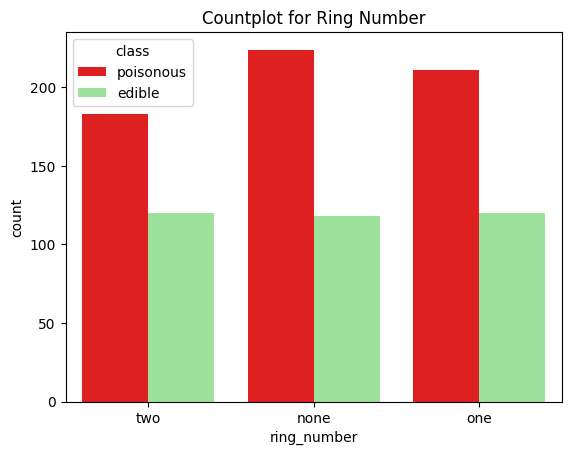

In [45]:
sns.countplot(mushroom, x='ring_number', palette=['red', 'lightgreen'], hue='class')
plt.title('Countplot for Ring Number')

Text(0.5, 1.0, 'Countplot for Ring Type')

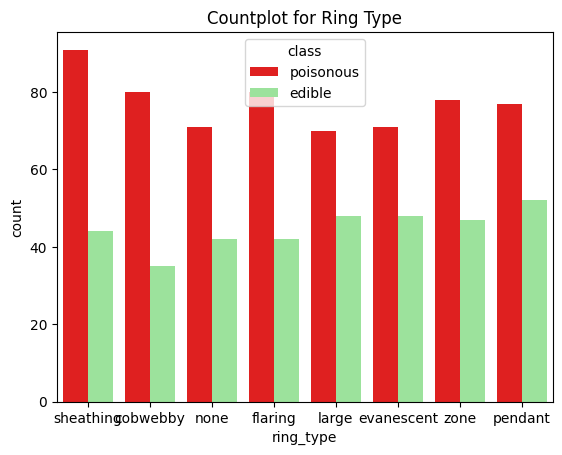

In [46]:
sns.countplot(mushroom, x='ring_type', palette=['red', 'lightgreen'], hue='class')
plt.title('Countplot for Ring Type')

Text(0.5, 1.0, 'Countplot for Spore Print Color')

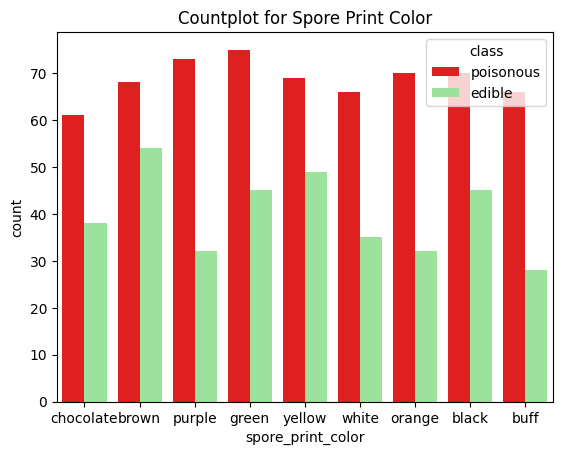

In [47]:
sns.countplot(mushroom, x='spore_print_color', palette=['red', 'lightgreen'], hue='class')
plt.title('Countplot for Spore Print Color')

Text(0.5, 1.0, 'Countplot for Population')

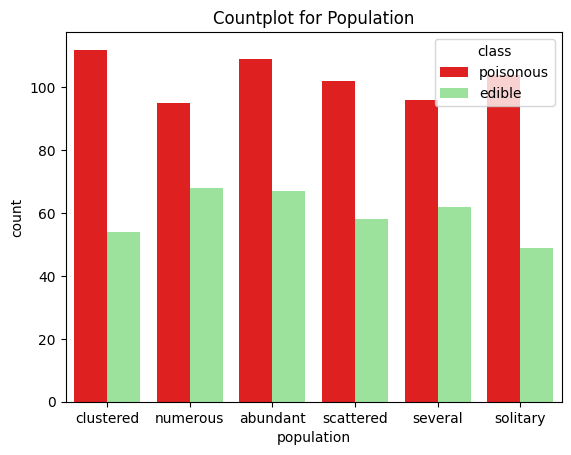

In [48]:
sns.countplot(mushroom, x='population', palette=['red', 'lightgreen'], hue='class')
plt.title('Countplot for Population')

Text(0.5, 1.0, 'Countplot for Habitat')

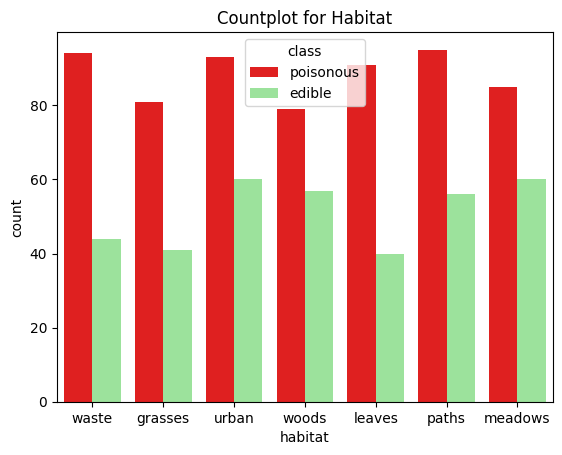

In [49]:
sns.countplot(mushroom, x='habitat', palette=['red', 'lightgreen'], hue='class')
plt.title('Countplot for Habitat')

We can clearly see that the data is imbalanced. If we build the model on such imbalanced data, it will predict the value for most likely outcome only which is 'poisonous'.

In [50]:
from imblearn.combine import SMOTETomek
os_us = SMOTETomek(random_state=42, n_jobs=-1)
X_train_res, Y_train_res = os_us.fit_resample(X_train, Y_train)

In [51]:
Y_train_res.value_counts()

,count
class,
0,467
1,467


##Task 4: SVM Implementation
1.	Implement a basic SVM classifier using Python libraries like scikit-learn.
2.	Train the SVM model on the training data.
3.	Evaluate model performance on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score).


In [52]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train_res, Y_train_res)

SVC()

In [53]:
Y_pred_train = svc.predict(X_train_res)
Y_pred_test = svc.predict(X_test)

In [54]:
Y_pred_train

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,

In [55]:
Y_pred_test

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("ACCURACY:")
print('Training Accuracy: ', accuracy_score(Y_train_res, Y_pred_train))
print('Testing Accuracy: ', accuracy_score(Y_test, Y_pred_test))
print()

print("PRECISION:")
print('Training Precision: ', precision_score(Y_train_res, Y_pred_train))
print('Testing Precision: ', precision_score(Y_test, Y_pred_test))
print()

print("RECALL:")
print('Training Recall: ', recall_score(Y_train_res, Y_pred_train))
print('Testing Recall: ', recall_score(Y_test, Y_pred_test))
print()

print("F1:")
print('Training f1: ', f1_score(Y_train_res, Y_pred_train))
print('Testing f1: ', f1_score(Y_test, Y_pred_test))
print()

# Model is showing good performance

ACCURACY:
Training Accuracy:  0.7237687366167024
Testing Accuracy:  0.5510204081632653

PRECISION:
Training Precision:  0.6960600375234521
Testing Precision:  0.6267605633802817

RECALL:
Training Recall:  0.7944325481798715
Testing Recall:  0.717741935483871

F1:
Training f1:  0.742
Testing f1:  0.6691729323308271



##Task 5: Visualization of SVM Results
1.	Visualize classification results on the testing data.


<Axes: xlabel='pca1', ylabel='pca2'>

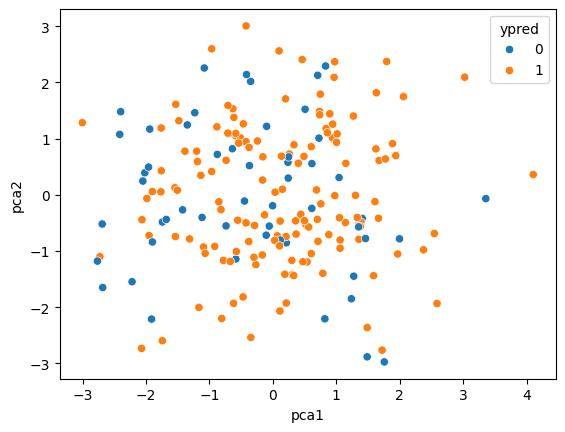

In [57]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
h=0.2

scaler = StandardScaler()

X_test_scaled = X_test.copy()
X_test_scaled[X_test.columns] = scaler.fit_transform(X_test)
reduced_data = PCA(n_components=2).fit_transform(X_test_scaled)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
results['ypred'] = Y_pred_test
sns.scatterplot(results, x='pca1', y='pca2', hue='ypred')

##Task 6: Parameter Tuning and Optimization
1.	Experiment with different SVM hyperparameters (e.g., kernel type, regularization parameter) to optimize performance.


In [58]:
params = {
    'C': [0.1,0.001,1,2,5],
    'kernel' : ['linear', 'poly', 'rbf'],
    'gamma' : [0.1,0.01,1,2,5]
}

In [59]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(SVC(), param_grid= params, verbose=1)

grid.fit(X_train_res, Y_train_res)

Fitting 5 folds for each of 75 candidates, totalling 375 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.001, 1, 2, 5],
                         'gamma': [0.1, 0.01, 1, 2, 5],
                         'kernel': ['linear', 'poly', 'rbf']},
             verbose=1)

In [60]:
grid.best_params_

{'C': 2, 'gamma': 0.1, 'kernel': 'rbf'}

In [61]:
grid.best_score_

0.8481283422459892

In [62]:
# Lets build the model on the besis of best params
svm_model = SVC(C=2, kernel='rbf', gamma=0.1)
svm_model.fit(X_train_res, Y_train_res)

SVC(C=2, gamma=0.1)

In [63]:
svm_model.score(X_train_res, Y_train_res)

1.0

In [64]:
svm_model.score(X_test, Y_test)

0.6326530612244898

#Task 7: Comparison and Analysis
1.	Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).
2.	Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.
3.	Discuss practical implications of SVM in real-world classification tasks.


In [65]:
from sklearn.metrics import classification_report

svm_linear = SVC(C=2, kernel='linear', gamma=0.1)
svm_linear.fit(X_train_res, Y_train_res)
print(classification_report(Y_test, svm_linear.predict(X_test)))

              precision    recall  f1-score   support

           0       0.38      0.39      0.39        72
           1       0.64      0.64      0.64       124

    accuracy                           0.55       196
   macro avg       0.51      0.51      0.51       196
weighted avg       0.55      0.55      0.55       196



In [66]:
svm_poly = SVC(C=2, kernel='poly', gamma=0.1)
svm_poly.fit(X_train_res, Y_train_res)
print(classification_report(Y_test, svm_poly.predict(X_test)))

              precision    recall  f1-score   support

           0       0.35      0.43      0.39        72
           1       0.62      0.54      0.58       124

    accuracy                           0.50       196
   macro avg       0.49      0.49      0.48       196
weighted avg       0.52      0.50      0.51       196



In [67]:
svm_rbf = SVC(C=2, kernel='rbf', gamma=0.1)
svm_rbf.fit(X_train_res, Y_train_res)
print(classification_report(Y_test, svm_rbf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        72
           1       0.63      1.00      0.78       124

    accuracy                           0.63       196
   macro avg       0.32      0.50      0.39       196
weighted avg       0.40      0.63      0.49       196



#Answers
1. For the higher dimensions 'linear' kernel is consider as the best. Linear kernel is used when the data is linearly separable. The RBF kernel is suitable for nonlinear problems and is the default choice for SVM. Polynomial kernels are useful when treating problems that show polynomial behavior.
2. For the mushroom dataset, SVM model performs well in predicting the new data. It shows the good accuracy. But visually in 2D it might shows the data scattered. In 3D it might separate the data well. SVM is effective when the number of dimensions is greater than number of samples. For more noise in the data, SVM does not perform well. As previously the dataset was imbalanced so it was not showing the good results for the minority class.
3. The real life applications of SVM :
* Face detection : SVMc classify parts of the image as a face and non-face
* Text and hypertext categorization: It uses training data to classify documents into different categories.
* Classification of images : Use of SVMs provides better search accuracy for image classification.